# Ridge regression

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import Ridge

In [5]:
df=pd.read_csv('dataset/Linear_regression_dataset.csv',header='infer')
df.head()

,var_1,var_2,var_3,var_4,var_5,output
0,734,688,81,0.328,0.259,0.418
1,700,600,94,0.320,0.247,0.389
2,712,705,93,0.311,0.247,0.417
3,734,806,69,0.315,0.260,0.415
4,613,759,61,0.302,0.240,0.378


In [6]:
X = df.iloc[:,:5]

In [7]:
X.head()

,var_1,var_2,var_3,var_4,var_5
0,734,688,81,0.328,0.259
1,700,600,94,0.320,0.247
2,712,705,93,0.311,0.247
3,734,806,69,0.315,0.260
4,613,759,61,0.302,0.240


In [8]:
X.shape

(1232, 5)

In [9]:
y=df.iloc[:,5]

In [10]:
y.head()

0    0.418
1    0.389
2    0.417
3    0.415
4    0.378
Name: output, dtype: float64

# 2. Data visualization

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

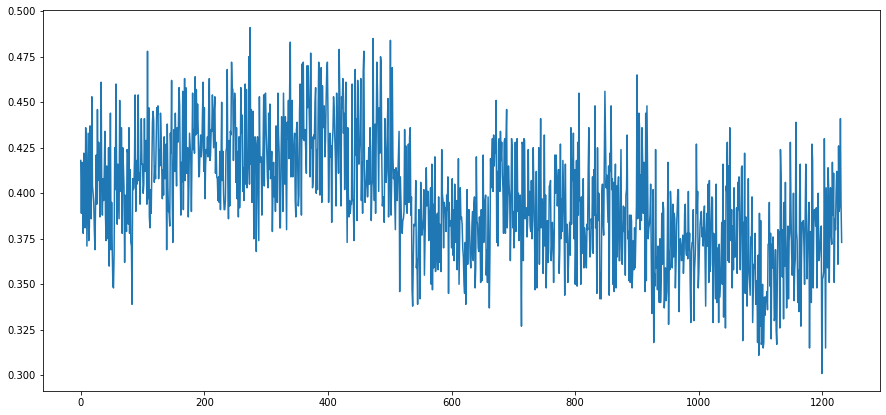

In [12]:
x_axis = list(range(X.shape[0]))
y_axis = y

fig, ax = plt.subplots()
ax.plot(x_axis,y_axis, '-')
fig.set_size_inches(15,7)
plt.show()

In [13]:
import seaborn as sns

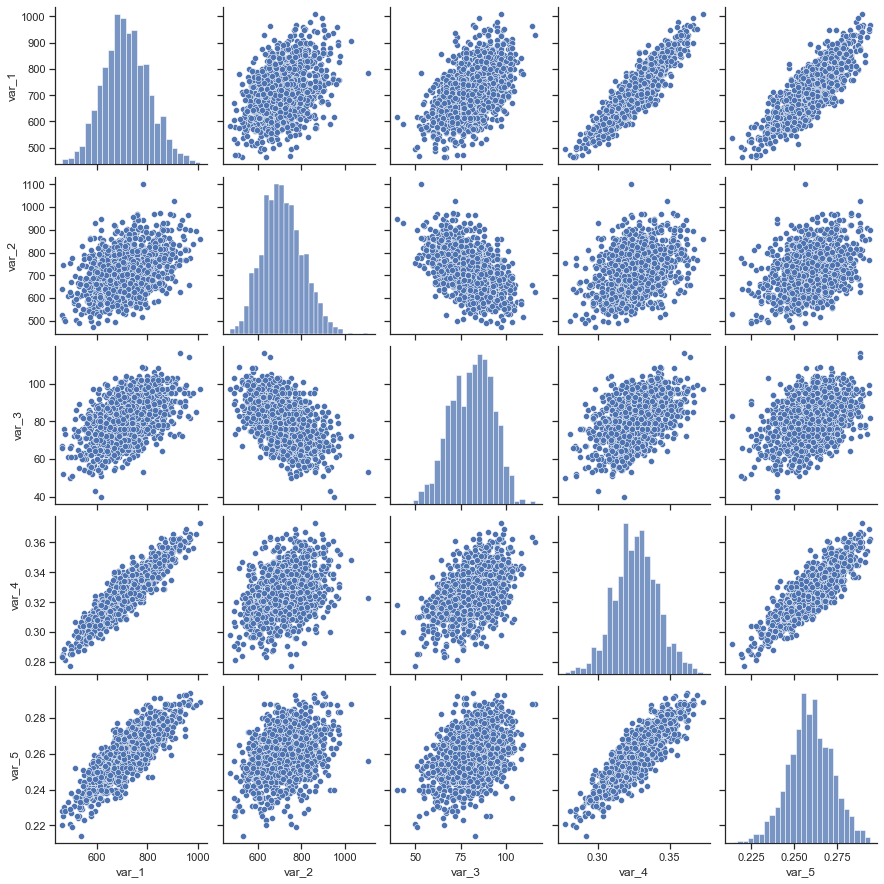

In [14]:
sns.set(style='ticks')
sns.pairplot(X)

# 3. Ridge Model with ideal alpha

In [15]:
ridge = Ridge(alpha=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
X_train.shape

(862, 5)

In [18]:
X_test.shape

(370, 5)

In [19]:
X.shape

(1232, 5)

In [20]:
X_train.shape[0]/X.shape[0]

0.6996753246753247

In [21]:
X_test.shape[0]/X.shape[0]

0.3003246753246753

In [22]:
ridge.fit(X_train,y_train)
y_preds=ridge.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_preds))

0.0001677938803540706


## 3.2 alpha optimization

In [24]:
alphas = np.arange(0.001,0.1,0.001)

In [25]:
len(alphas)
alphas[55]

0.056

In [26]:
mse = list()
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_preds=ridge.predict(X_test)
    error=round(mean_squared_error(y_test,y_preds),8)
    mse.append(error)
    
alpha_error=pd.DataFrame({
        'mean squared error':mse,
        'alpha':alphas
    })

In [27]:
alpha_error

,mean squared error,alpha
0,0.000154,0.001
1,0.000154,0.002
2,0.000154,0.003
3,0.000154,0.004
4,0.000154,0.005
...,...,...
94,0.000163,0.095
95,0.000163,0.096
96,0.000163,0.097
97,0.000163,0.098


In [28]:
alpha_error[alpha_error['mean squared error']==alpha_error['mean squared error'].min()]

,mean squared error,alpha
3,0.000154,0.004


In [29]:
ridge = Ridge(alpha=0.004)
lr = ridge.fit(X_train,y_train)
y_preds=lr.predict(X_test)
error=round(mean_squared_error(y_test,y_preds),12)
error

0.000154254026

In [30]:
lr.coef_

array([ 3.39267958e-04,  4.50499228e-05,  1.43385545e-04, -5.82447262e-01,
        4.44200922e-01])

In [31]:
lr.intercept_

0.1855667947952167

# 4. Import model for deploy in app web 

In [32]:
import joblib
joblib.dump(lr,'models/linear_regression_model_with_ridge.pkl')

['models/linear_regression_model_with_ridge.pkl']

In [33]:
del lr

In [34]:
lr

NameError: name 'lr' is not defined